In [1]:
import os
os.getcwd()

'D:\\Documents\\PycharmProjects\\LEADING-RAMP'

In [2]:
import pandas as pd

https://www.machinelearningplus.com/time-series/time-series-analysis-python/ 

In [3]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [4]:
unm = pd.read_csv("D:\\Documents\\PycharmProjects\\LEADING-RAMP\\university_new_mexico_RAMP_pc_daily_clicks.csv", parse_dates = ['date'], usecols = ['date', 'clicks'])

In [5]:
list(unm.columns.values.tolist())

['date', 'clicks']

In [6]:
unm.head()

,date,clicks
0,2017-02-01,1485
1,2017-02-02,1336
2,2017-02-03,928
3,2017-02-04,739
4,2017-02-05,951


In [7]:
#Or import as a time series index with date
unm_index = pd.read_csv("D:\\Documents\\PycharmProjects\\LEADING-RAMP\\university_new_mexico_RAMP_pc_daily_clicks.csv", parse_dates = ['date'], index_col = "date")
unm_index.head()

,clicks,repository_id
date,,
2017-02-01,1485,university_new_mexico
2017-02-02,1336,university_new_mexico
2017-02-03,928,university_new_mexico
2017-02-04,739,university_new_mexico
2017-02-05,951,university_new_mexico


In [8]:
unm_index = unm_index.iloc[:, [0]] #Select all rows and specific columms

In [9]:
unm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1528 non-null   datetime64[ns]
 1   clicks  1528 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.0 KB


In [10]:
unm_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1528 entries, 2017-02-01 to 2021-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   clicks  1528 non-null   int64
dtypes: int64(1)
memory usage: 23.9 KB


In [11]:
#sort the dataframe 
unm.sort_index(inplace=True)

Visualization

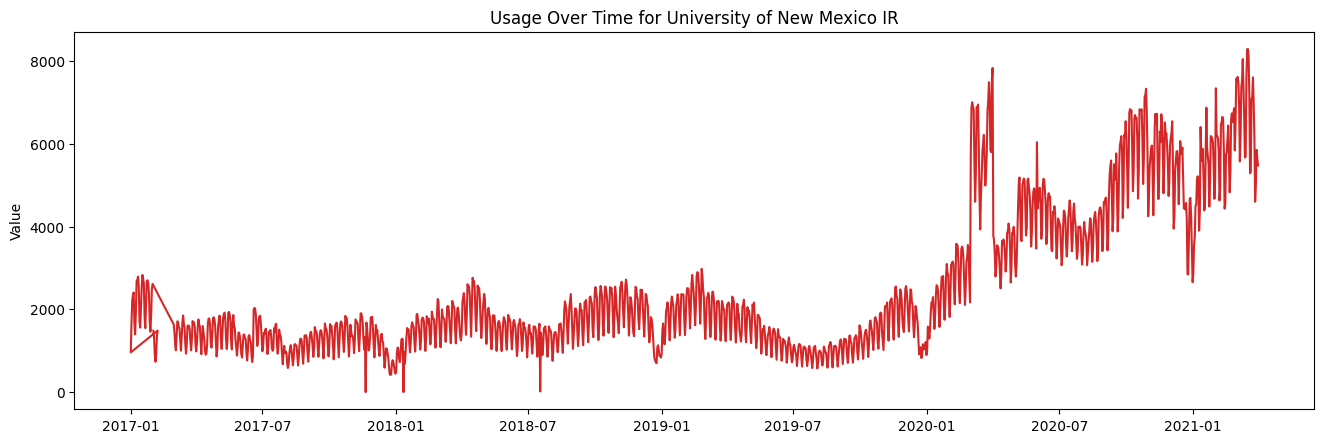

In [12]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(unm, x, y, title="", xlabel='', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(unm, x=unm['date'], y=unm['clicks'], title='Usage Over Time for University of New Mexico IR')    

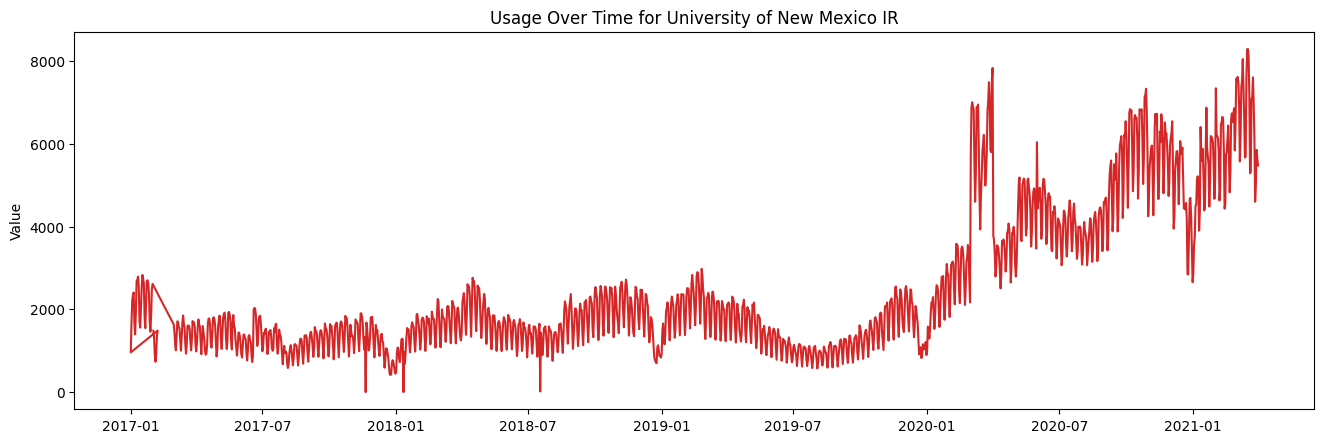

In [13]:
# Draw Plot with unm_index to see if there is a difference 
def plot_df(unm_index, x, y, title="", xlabel='', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(unm_index, x=unm_index.index, y=unm_index['clicks'], title='Usage Over Time for University of New Mexico IR')    

After plotting the complete set of data from 2017 - 2021, we are now conducting decomposition and autocorrection. 

In [14]:
!pip install statsmodels

Using Python Statsmodels TSA (Time series analysis) https://www.statsmodels.org/stable/tsa.html?highlight=tsa#module-statsmodels.tsa 

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [16]:
#Sort the Dataframe before next step
#Only the dataframe with date as index can be used in the following steps
unm_index.sort_index(inplace=True)

In [17]:
unm_index.head()

,clicks
date,
2017-01-01,964
2017-01-02,1674
2017-01-03,2218
2017-01-04,2332
2017-01-05,2410


In [18]:
# Additive Decomposition
decomposition = seasonal_decompose(unm_index['clicks'], model='additive', extrapolate_trend='freq', period = 7) # for now I'm using 7 for weekly cycle 

In [19]:
# Multiplicative Decomposition 
decomposition_2 = seasonal_decompose(unm_index['clicks'], model='multiplicative', extrapolate_trend='freq', period = 7) # for now I'm using 7 for weekly cycle 

In [20]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

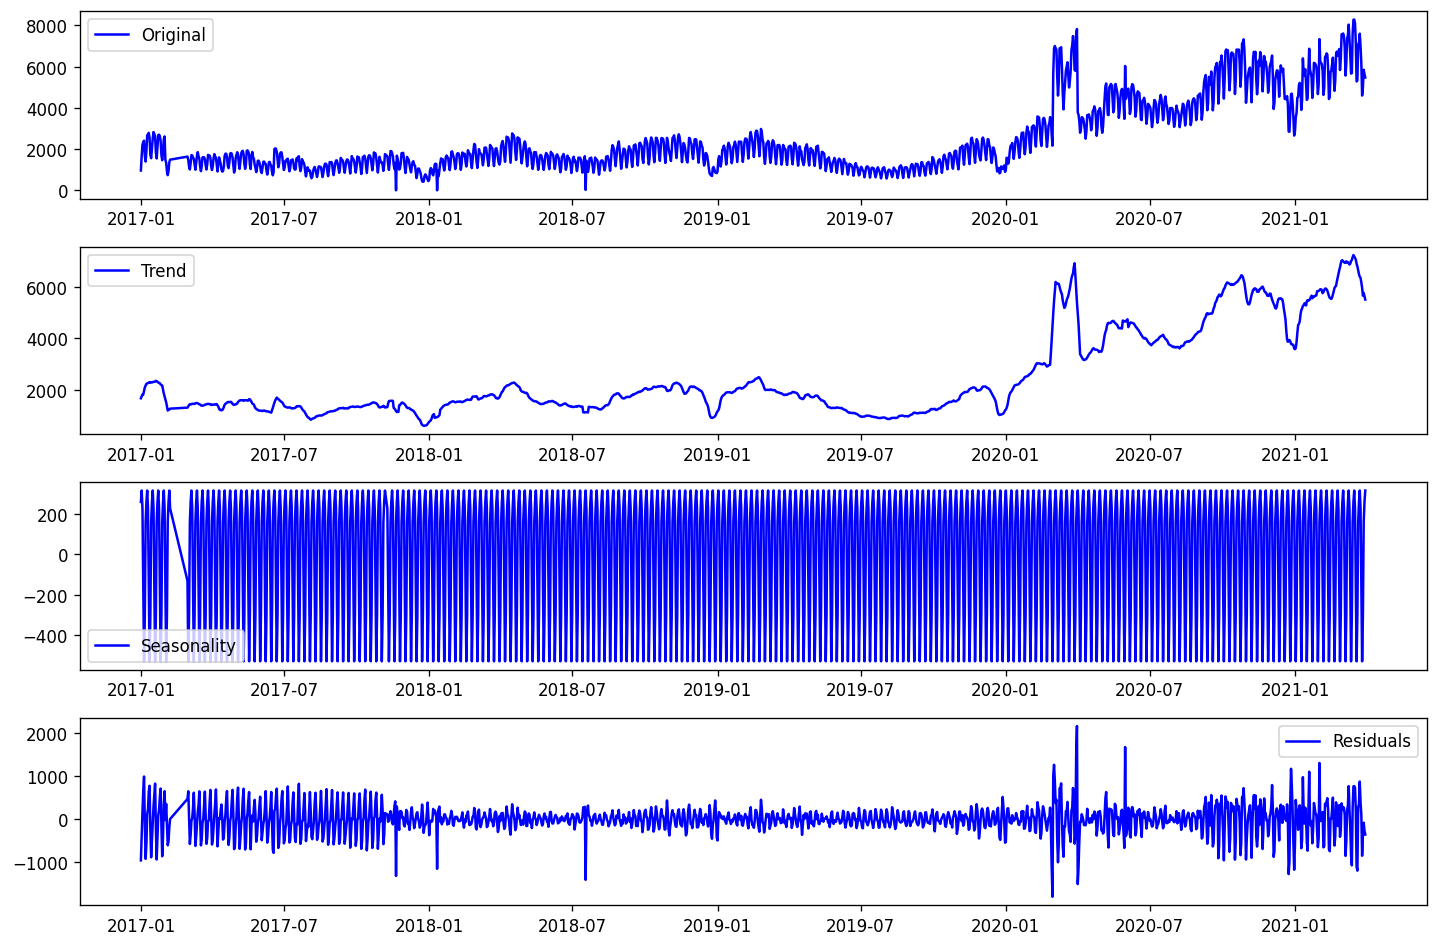

In [21]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(unm_index['clicks'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [22]:
# summary statistics
print(residual.describe())

count    1528.000000
mean       -0.718691
std       323.629011
min     -1800.220002
25%      -127.384905
50%         9.722238
75%       153.411879
max      2165.218081
Name: resid, dtype: float64


In [23]:
np.mean(residual)

-0.7186909980060762

Period parameters will need adjustment 
https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453 

stattools in tsa has acf to calculate the autocorrlection function, pacf for partical autocorrelation. Autocorrelation is the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value. 

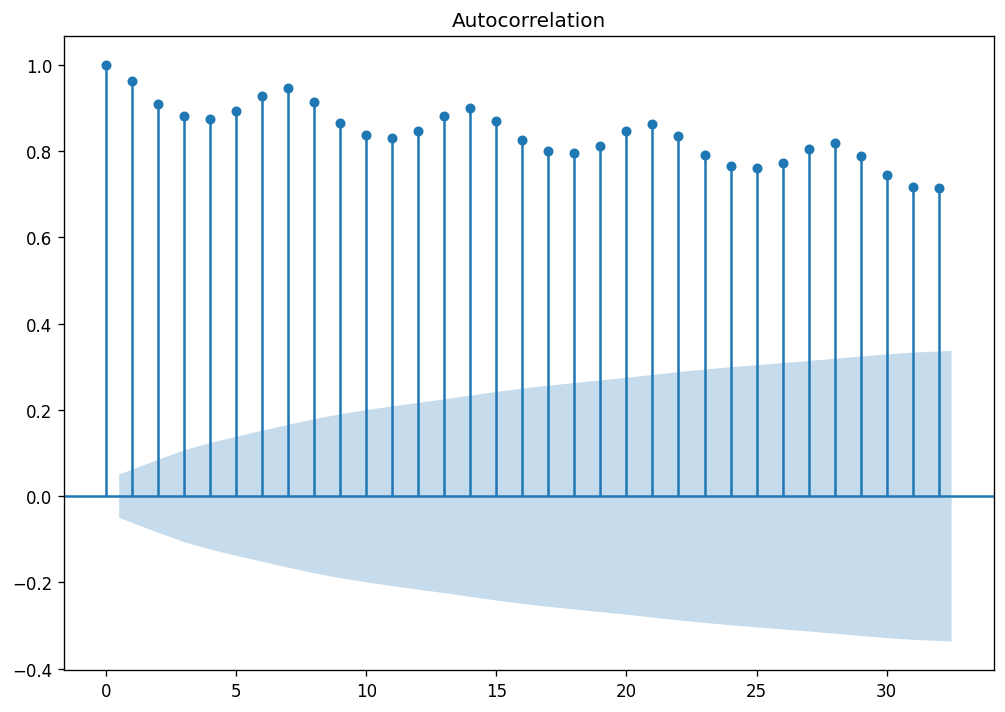

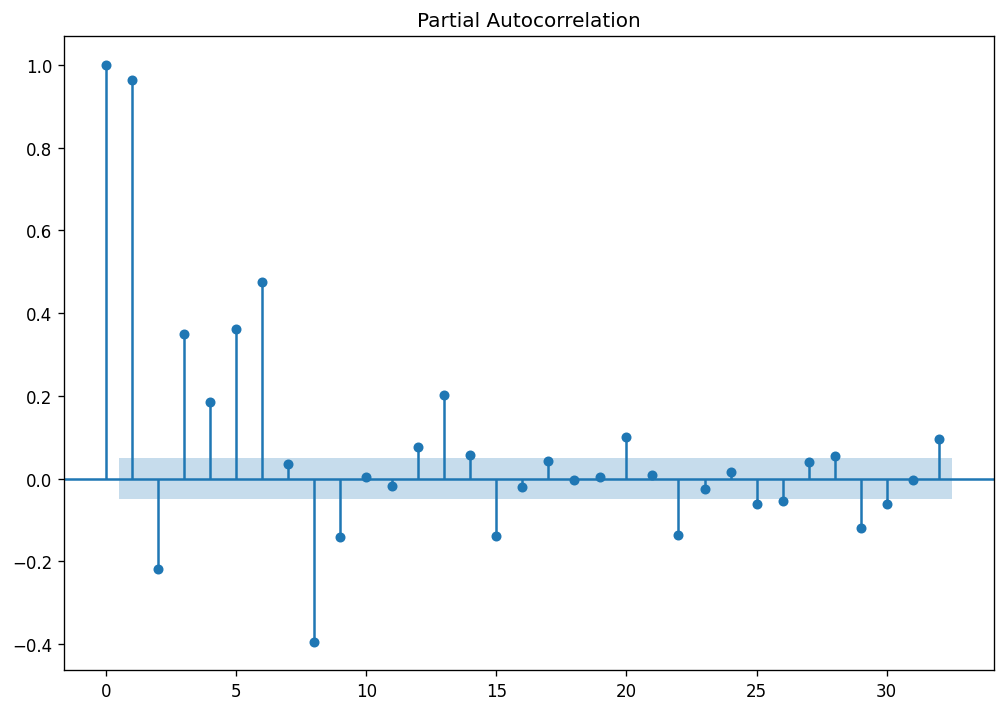

In [24]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting
plot_acf(unm_index['clicks'], alpha = .05)
plot_pacf(unm_index['clicks'], alpha = .05)
plt.show()

The autocorrelation plot has a 95% confidence band. The plot shoes that the usage patterns autocorrletions are strong and postive, and decay at a very slow rate. Therefore, the plot indicates that usage pattern is non-stationary. 

The partial autocorrection plot has a 95% confidence bands showed several lags are significant. 

Reference: Model Identification - NIST Handbook - https://www.itl.nist.gov/div898/handbook/pmc/section6/pmc622.htm 